In [161]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, svm
from sklearn import preprocessing

## Neural Network libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix

In [162]:
## Load the dataset
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# EXPLORATORY DATA ANALYSIS #

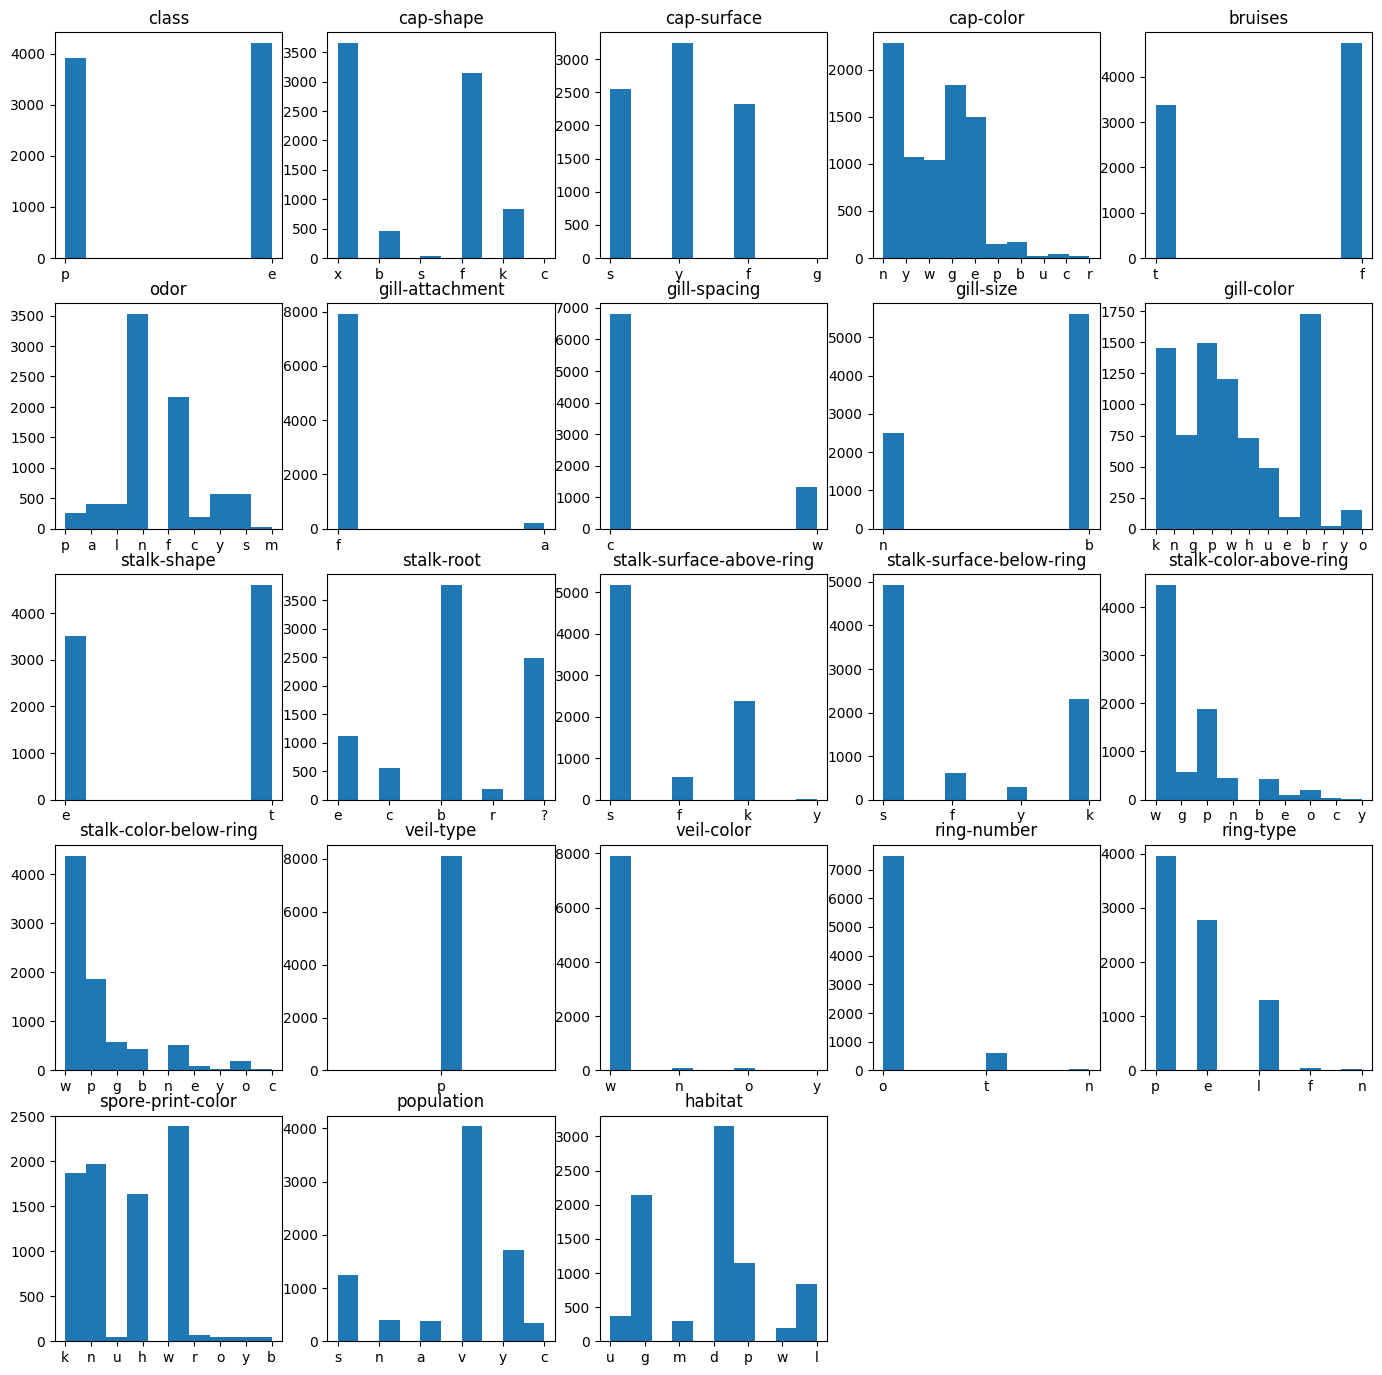

In [163]:
plt.figure(figsize = (17,17))
for index,column in enumerate(df.columns):
    plt.subplot(5, 5, index+1)
    plt.hist(df[column])
    plt.title(column)

From above, few insights:
* `cap shape` = convex and flat
* `cap surface` = scaly
* `cap color` = many colors, but predominantly brown
* `bruises` = a bit more without bruises
* `odor` = none. But many others with foul odor
* `gill attachment` = free
* `gill spacing` = close
* `gill size` = broad
* `gillcolor` = many colors, but predominantly buff
* `stalk shape` = most are stapering
* `stalk root` = bulbous
* `stalk surface above ring` = smooth
* `stalk color above ring` = white
* `stalk color below ring` = white
* `veil type` = all of them are partial
* `veil color` = almost all of them white
* `ring number` = most of them one
* `ring type` = pendant
* `spore print color` = white, followed by many others
* `population` = several
* `habitat` = woods mostly


### **From above histogram we can conclude that the dataset is `not` significantly `imbalanced`**

C:\Users\User\AppData\Local\Temp\ipykernel_3392\3600220280.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, index+1)


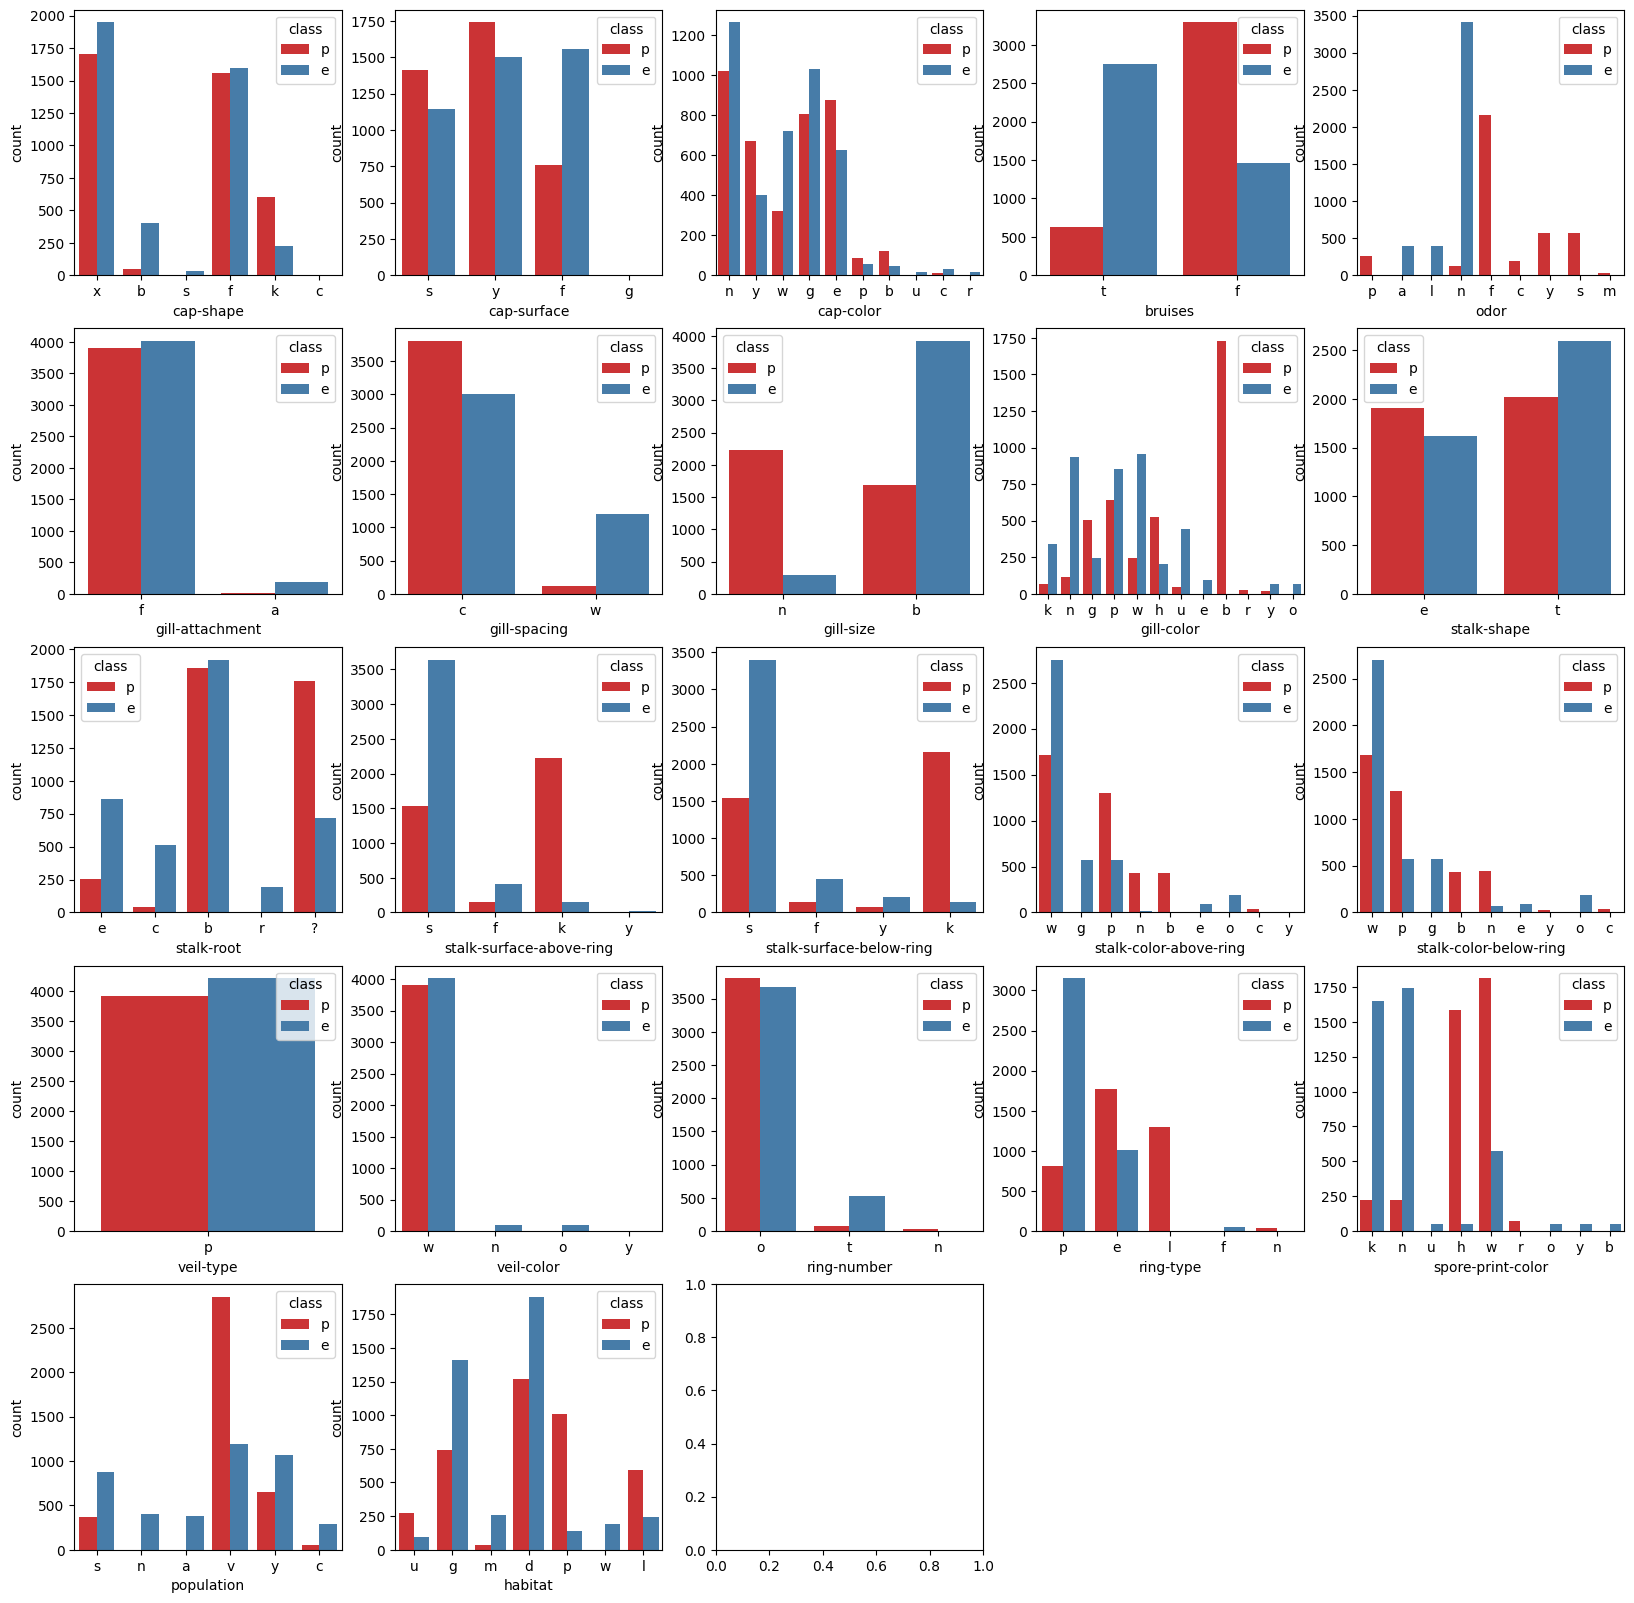

In [ ]:
plt.figure(figsize = (20,20))

for index,column in enumerate(df.columns):
    ax = sns.countplot(data = df, x= df[column], hue ='class',palette='Set1')
    plt.subplot(5, 5, index+1)
plt.show()


***This time, the analysis was performed by spliting and grouping the data into class labels*** 
![alt text here](images/index-pointing-up.png)

In [ ]:
df.duplicated().sum()

0

No duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No apparent Nulls from above. But I need to dig deeper (because there might be some string that may indicate there are nulls), so I'll proceed as follows

In [ ]:
## Checking distinct categories in every column:
for type in df.columns:
    print("Column", type, ":",df[type].unique())

Column class : ['p' 'e']
Column cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
Column cap-surface : ['s' 'y' 'f' 'g']
Column cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Column bruises : ['t' 'f']
Column odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Column gill-attachment : ['f' 'a']
Column gill-spacing : ['c' 'w']
Column gill-size : ['n' 'b']
Column gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Column stalk-shape : ['e' 't']
Column stalk-root : ['e' 'c' 'b' 'r' '?']
Column stalk-surface-above-ring : ['s' 'f' 'k' 'y']
Column stalk-surface-below-ring : ['s' 'f' 'y' 'k']
Column stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Column stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Column veil-type : ['p']
Column veil-color : ['w' 'n' 'o' 'y']
Column ring-number : ['o' 't' 'n']
Column ring-type : ['p' 'e' 'l' 'f' 'n']
Column spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
Column population : ['s' 'n' 'a' 'v' 'y' 'c']
Column habitat : [

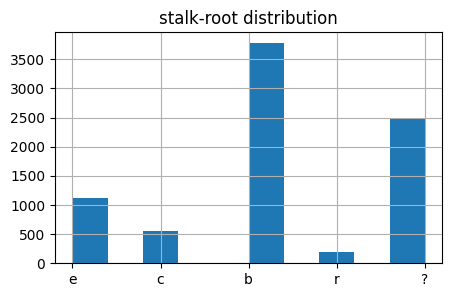

In [ ]:
## If I look closely to the above block of code, I see there's an interrogation mark (?) in stalk-root column, which means that is a missing value. 
## Then, I need to find out which category is the most representative value (in this case the mode) to replace it with.
df['stalk-root'].hist(bins= 10, figsize= (5,3))
plt.title('stalk-root distribution')
plt.show()


In [ ]:
## I'm replacing the "?" with "b" in stalk-root column
df = df.replace(to_replace= "?", value = "b")

In [ ]:
## Checking if I have replaced succesfully the missing values
print(df['stalk-root'].unique())

['e' 'c' 'b' 'r']


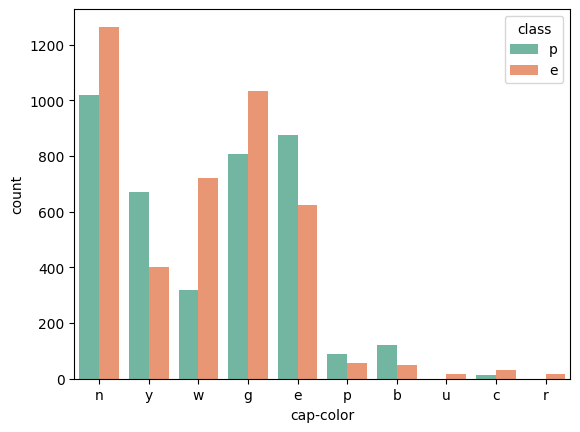

In [ ]:
ax = sns.countplot(data = df, x= df["cap-color"], hue ='class',palette='Set2')


## Encoding ##

In [ ]:
## Using Label Encoding where my data has just 2 categories (because I want to keep the dimensionality as little as possible and this ordinal encoding does not have effect on binomial columns)
encoder = preprocessing.LabelEncoder() # creating labelEncoder

# Converting strings into numbers
for column in df.columns:
    if len(df[column].unique()) ==2:
        df[column] = encoder.fit_transform(df[column])
    else:
        dummies = pd.get_dummies(df[column],prefix=column)
        df = pd.concat((df, dummies), axis = 1)
        df.drop(column, axis = 1, inplace = True)

In [ ]:
df.shape

(8124, 112)

In [ ]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
## Checking distinct categories in every column:
for type in df.columns:
    print("Column", type, ":",np.unique(df))

Column class : [0 1]
Column bruises : [0 1]
Column gill-attachment : [0 1]
Column gill-spacing : [0 1]
Column gill-size : [0 1]
Column stalk-shape : [0 1]
Column cap-shape_b : [0 1]
Column cap-shape_c : [0 1]
Column cap-shape_f : [0 1]
Column cap-shape_k : [0 1]
Column cap-shape_s : [0 1]
Column cap-shape_x : [0 1]
Column cap-surface_f : [0 1]
Column cap-surface_g : [0 1]
Column cap-surface_s : [0 1]
Column cap-surface_y : [0 1]
Column cap-color_b : [0 1]
Column cap-color_c : [0 1]
Column cap-color_e : [0 1]
Column cap-color_g : [0 1]
Column cap-color_n : [0 1]
Column cap-color_p : [0 1]
Column cap-color_r : [0 1]
Column cap-color_u : [0 1]
Column cap-color_w : [0 1]
Column cap-color_y : [0 1]
Column odor_a : [0 1]
Column odor_c : [0 1]
Column odor_f : [0 1]
Column odor_l : [0 1]
Column odor_m : [0 1]
Column odor_n : [0 1]
Column odor_p : [0 1]
Column odor_s : [0 1]
Column odor_y : [0 1]
Column gill-color_b : [0 1]
Column gill-color_e : [0 1]
Column gill-color_g : [0 1]
Column gill-col

## ML MODELS ##

### Logistic Regression ###

In [ ]:
## split the data into independent and dependent variable
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
## Train the logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make the Prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,0
...,...,...
3602,0,0
1169,0,0
3650,0,0
2828,0,0


Accuracy: 1.0 



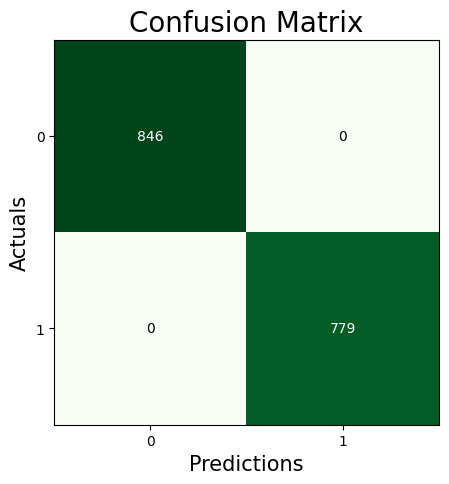

In [ ]:
# Evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_LR)

print('Accuracy:', accuracy_LR, '\n')
# Plotting a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5,5), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.show()



In [ ]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
auc = roc_auc_score(y_test, pred_LR)
print('AUC: %f' %auc)

AUC: 1.000000


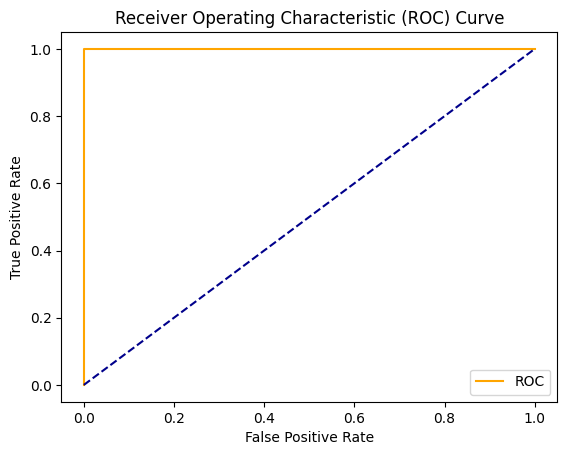

In [ ]:
fpr, tpr = roc_curve(y_test, pred_LR)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Naive Bayes ###

In [ ]:
## Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
6506,1,1
5656,1,1
4908,1,1
1384,0,0
3305,0,0
...,...,...
3602,0,1
1169,0,0
3650,0,0
2828,0,0


Accuracy: 1.0 



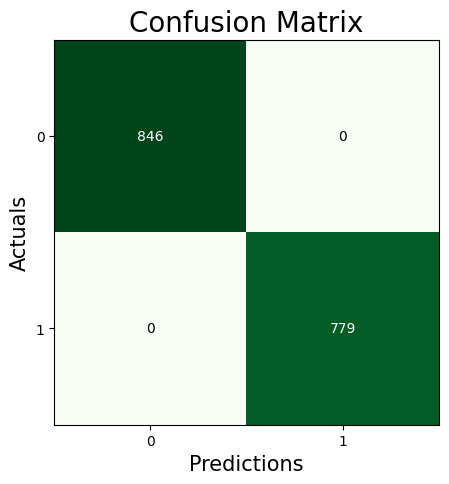

In [ ]:
# Evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_LR)

print('Accuracy:', accuracy_LR, '\n')
# Plotting a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5,5), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=20)
plt.show()



In [ ]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       846
           1       0.89      1.00      0.94       779

    accuracy                           0.94      1625
   macro avg       0.95      0.94      0.94      1625
weighted avg       0.95      0.94      0.94      1625



In [ ]:
auc = roc_auc_score(y_test, y_pred_NB)
print('AUC: %f' %auc)

AUC: 0.943262


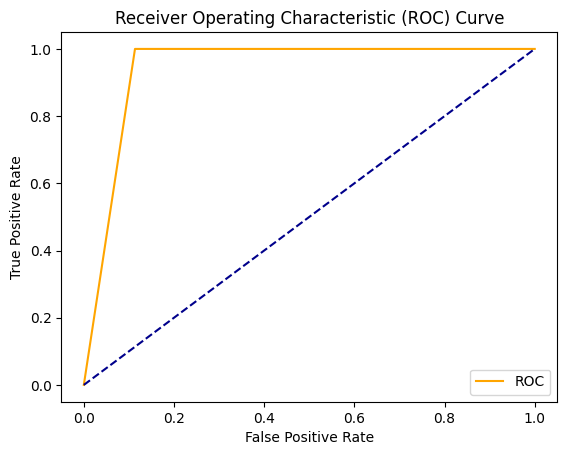

In [ ]:
fpr, tpr = roc_curve(y_test, y_pred_NB)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
import pickle  # a file that contains binary format. It helps transmit the files over the network

# Save the model to a file
with open('Poisonous_Mushroom_model.pkl', 'wb') as file:
    pickle.dump(model_LR, file)
